In [ ]:
!pip install scratchai-nightly   # for adversarial attack
!pip install torchvision         # deep learning models
!pip install flashtorch          # visualization based on activation maximization
!pip install mapextrackt         # visualization of neural network saliency map
!pip install tqdm
!pip install requests
!pip install opencv-python
!pip install scipy
!pip install Pillow==9.5.0

In [ ]:
# download and store locally a stop sign image
stop_sign_url = 'https://static01.nyt.com/images/2011/12/11/magazine/11wmt1/mag-11WMT-t_CA0-jumbo.jpg'
!mkdir input_images
!wget https://static01.nyt.com/images/2011/12/11/magazine/11wmt1/mag-11WMT-t_CA0-jumbo.jpg -O input_images/stop.jpg

mkdir: cannot create directory ‘input_images’: File exists
--2025-09-12 17:57:22--  https://static01.nyt.com/images/2011/12/11/magazine/11wmt1/mag-11WMT-t_CA0-jumbo.jpg
Resolving static01.nyt.com (static01.nyt.com)... 151.101.1.164, 151.101.65.164, 151.101.129.164, ...
Connecting to static01.nyt.com (static01.nyt.com)|151.101.1.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92066 (90K) [image/jpeg]
Saving to: ‘input_images/stop.jpg’

input_images/stop.j 100%[===================>]  89.91K  --.-KB/s    in 0.003s  

2025-09-12 17:57:22 (25.6 MB/s) - ‘input_images/stop.jpg’ saved [92066/92066]



In [ ]:
# suppress error
import logging as logging
import sys as sys
logging.disable(sys.maxsize)

# import the library
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models
from scratchai import *


from flashtorch.activmax import GradientAscent
from MapExtrackt import FeatureExtractor
from torch.distributions import Normal


# set parameters
stop_sign_path = 'input_images/stop.jpg' #stop sign image path
true_class = 919 # imagenet id for street sign


# function handle to get prediction more easily
def get_prediction(image, model):
    #assumes img and net are datasets and models trained using imagenet dataset
    confidences = model(image.unsqueeze(0))
    class_idx = torch.argmax(confidences, dim=1).item()
    class_label = datasets.labels.imagenet_labels[class_idx]
    return class_label, confidences[0, class_idx].item(), class_idx

**1a: Making prediction**

In [ ]:
# load and preprocess the stop sign image
img = imgutils.load_img(stop_sign_path)
img = imgutils.get_trf('rz256_cc224_tt_normimgnet')(img) #normalize and reshape the input image

# REPLACE THE THREE DOTS WITH YOUR OWN CODE

net = models.resnet18(pretrained=True).eval()  # load resnet

# use the provided get_prediction function to predict the class of the stop sign image
label, confidence, label_id = get_prediction(img, net)

print(f"Prediction: {label}")
print(f"Confidence: {confidence:.4f}")
print(f"Label ID: {label_id}")

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 163MB/s]


Prediction: street sign
Confidence: 13.5581
Label ID: 919


**1b: Random perturbation**

Epsilon: 0.1
Prediction: street sign
Confidence: 14.5934
Label ID: 919


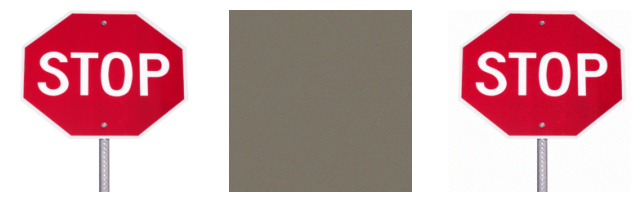

In [ ]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

epsilon = 0.1 # set the epsilon

torch.manual_seed(0) # set the random seed when you use functions that uses sampling

noisy_img = attacks.noise(img, eps=epsilon) # perform uniform random attack here [see the example in the Sec. 3.2.4 of the problem set]

label, confidence, label_id = get_prediction(noisy_img, net) # output prediction, conf, and label_id using get_prediction function

print(f"Epsilon: {epsilon}")
print(f"Prediction: {label}")
print(f"Confidence: {confidence:.4f}")
print(f"Label ID: {label_id}")

imgutils.imshow([img, noisy_img-img, noisy_img], normd=True) #output the original image, the perturbation image, the perturbed image

Epsilon: 0.5
Prediction: doormat, welcome mat
Confidence: 14.9555
Label ID: 539


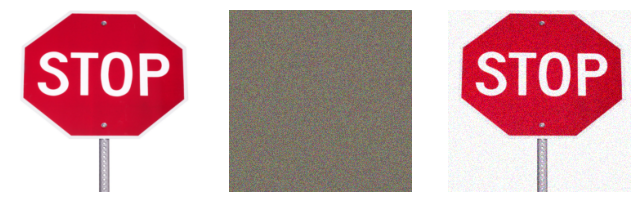

In [ ]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

epsilon = 0.5 # set the epsilon

torch.manual_seed(0) # set the random seed when you use functions that uses sampling

noisy_img = attacks.noise(img, eps=epsilon) # perform uniform random attack here [see the example in the Sec. 3.2.4 of the problem set]

label, confidence, label_id = get_prediction(noisy_img, net) # output prediction, conf, and label_id using get_prediction function

print(f"Epsilon: {epsilon}")
print(f"Prediction: {label}")
print(f"Confidence: {confidence:.4f}")
print(f"Label ID: {label_id}")

imgutils.imshow([img, noisy_img-img, noisy_img], normd=True) #output the original image, the perturbation image, the perturbed image

Epsilon: 1.0
Prediction: doormat, welcome mat
Confidence: 16.5986
Label ID: 539


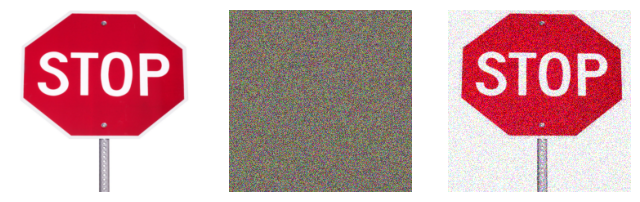

In [ ]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

epsilon = 1.0 # set the epsilon

torch.manual_seed(0) # set the random seed when you use functions that uses sampling

noisy_img = attacks.noise(img, eps=epsilon) # perform uniform random attack here [see the example in the Sec. 3.2.4 of the problem set]

label, confidence, label_id = get_prediction(noisy_img, net) # output prediction, conf, and label_id using get_prediction function

print(f"Epsilon: {epsilon}")
print(f"Prediction: {label}")
print(f"Confidence: {confidence:.4f}")
print(f"Label ID: {label_id}")

imgutils.imshow([img, noisy_img-img, noisy_img], normd=True) #output the original image, the perturbation image, the perturbed image

**1c: FGM Attack**

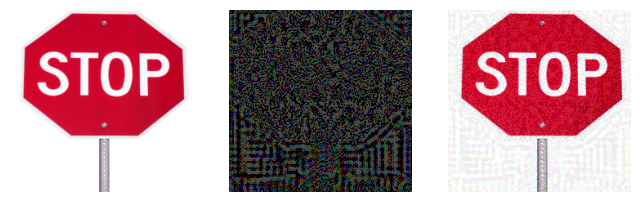

(('street sign', 13.55807876586914),
 ('doormat, welcome mat', 14.294464111328125))

In [ ]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

images, true_labels, predicted_labels = one_call.attack(stop_sign_path, atk=attacks.FGM, nstr='resnet18', ret=True) # perform FGM attacks and return all the outputs

imgutils.imshow(images) # show all the images [original, perturbation, and adversarial]

true_labels, predicted_labels # show true and predicted labels

**1d: PGD Attack**

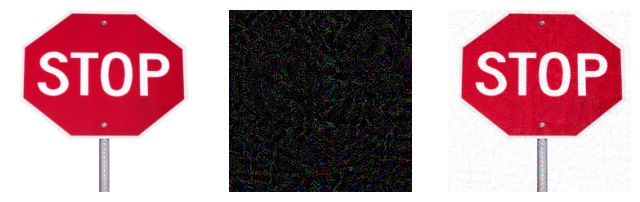

(('street sign', 13.55807876586914),
 ('streetcar, tram, tramcar, trolley, trolley car', 30.324737548828125))

In [ ]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

target_class = 829 # imagenet id for street car

images, true_labels, predicted_labels = one_call.attack(stop_sign_path, atk=attacks.PGD, nstr='resnet18', ret=True, y=target_class) # perform PGD attacks and return all the outputs

imgutils.imshow(images) # show all the images [original, perturbation, and adversarial]

true_labels, predicted_labels #show true and predicted labels

**2a: AlexNet layer 0 visualization**

In [ ]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

model = models.alexnet(pretrained=True).eval()  #load pretrained alexnet

print(model) #show the alexnet structure

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 156MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:1864: FutureWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  self._maybe_warn_non_full_backward_hook(args, result, grad_fn)


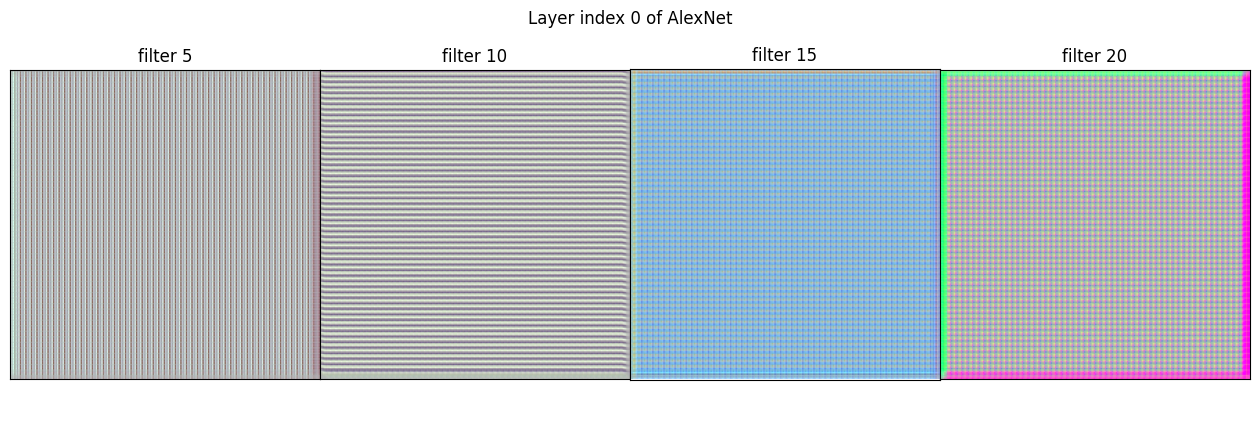

In [ ]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

#load GradientAscent on GPU
g_ascent = GradientAscent(model.features)
g_ascent.use_gpu = True

layer_idx = 0 # set the layer index

filters = [5,10,15,20] # set the filter numbers

layer = model.features[layer_idx] # select the 1st conv layer

g_ascent.visualize(layer, filters, title="Layer index 0 of AlexNet") # call g_ascent.visualize() with the correct arguments to output the visualization



**2b: AlexNet layer 10 visualization**

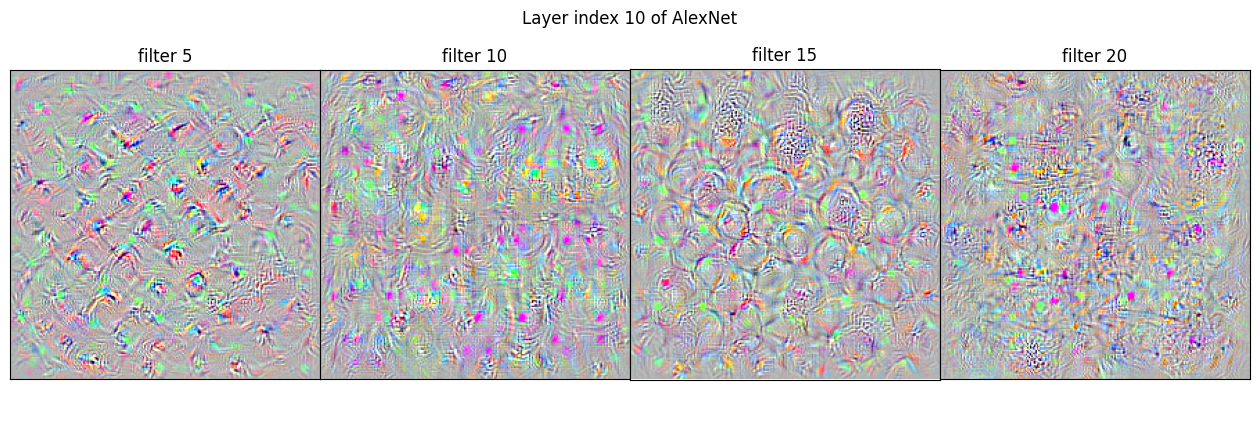

In [ ]:
# MODIFY THE CODE FOR 2a TO VISUALIZE LAYER 10, FILTERS [5, 10, 15, 20] OF ALEXNET
# model = models.alexnet(pretrained=True).eval()  #load pretrained alexnet

#load GradientAscent on GPU
g_ascent = GradientAscent(model.features)
g_ascent.use_gpu = True

layer_idx = 10 # set the layer index

filters = [5,10,15,20] # set the filter numbers

layer = model.features[layer_idx] # select the 1st conv layer

g_ascent.visualize(layer, filters, title="Layer index 10 of AlexNet") # call g_ascent.visualize() with the correct arguments to output the visualization



**2c: AlexNet saliency map with the stop sign image**

/usr/local/lib/python3.12/dist-packages/MapExtrackt/extractor.py:512: RuntimeWarning: invalid value encountered in cast
  out = (changed * 255).detach().to("cpu").numpy().astype(np.uint8)


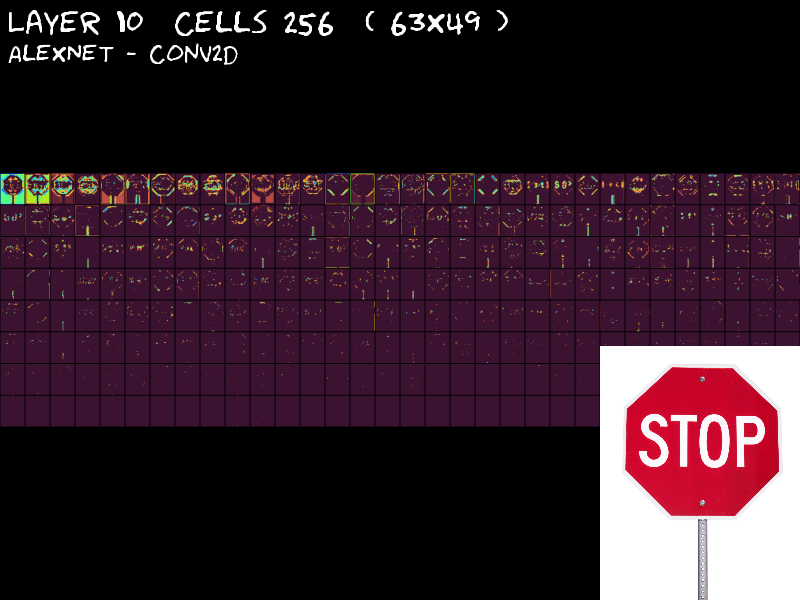

In [ ]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

# load FeatureExtractor
from MapExtrackt import FeatureExtractor

layer_idx = 10 #define the layer index

fe = FeatureExtractor(model)

fe.set_image(stop_sign_path) # stop_sign_path is the path to the stop sign image

fe.display_from_map(layer_no=layer_idx)

**3: Example of plot with a confidence interval**



<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3068394654.py:16: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(x, mean_, label="Estimated mean of $\delta$")


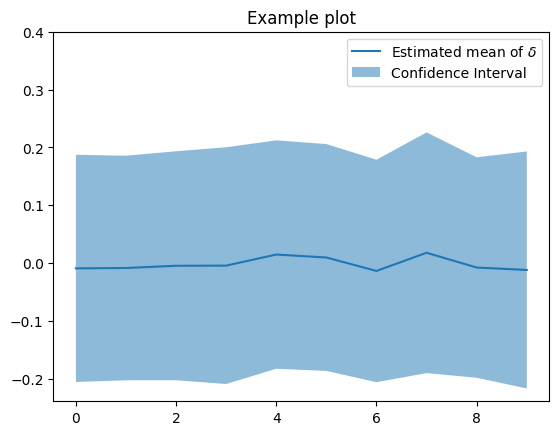

In [ ]:
#THIS IS JUST AN EXAMPLE TO PLOT CONFIDENCE INTERVAL AS SHADED AREA

n = 500 # number of samples
k = 10  # number of replications
sigma = 0.2

torch.manual_seed(0) # set the random seed
deltas = torch.FloatTensor(sigma*torch.randn(n, k)) # gaussian samples ~ N(0, sigma*I)

# compute mean and standard deviation
mean_ = deltas.mean(dim=0)
std_ = deltas.std(dim=0)

# generate the plot
x = np.arange(k) # populate x axis
plt.plot(x, mean_, label="Estimated mean of $\delta$")
plt.fill_between(x, mean_ - std_, mean_ + std_, alpha=0.5, label="Confidence Interval") # 1-sigma confidence interval
plt.legend()
plt.ylim([None, 0.4])
plt.title('Example plot')
plt.show()

**Density computation example with log_prob**

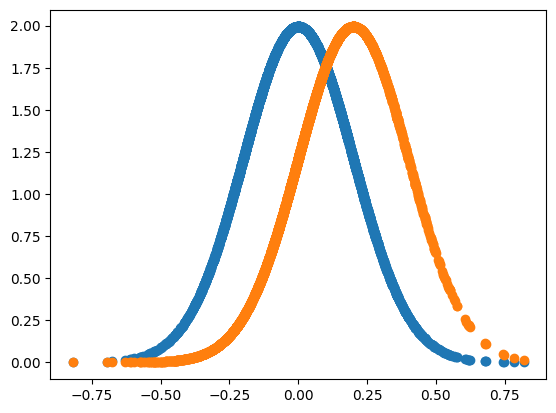

In [ ]:
# THIS IS AN EXAMPLE TO USE log_prob METHOD FOR EASIER DENSITY COMPUTATION

# Suppose you want to compute the density of Normal distribution

# create Normal distribution object
p = Normal(torch.tensor([0.0]), torch.tensor([sigma]))       # N(0, sigma**2)
p_tilde = Normal(torch.tensor([0.2]), torch.tensor([sigma])) # N(1, sigma**2)

# use log_prob method
log_density_orig = p.log_prob(deltas) # log_prob method gives you log densities
log_density_tilde = p_tilde.log_prob(deltas)

# verify this by plotting the density, i.e. the exp of the log_density
plt.scatter(deltas, torch.exp(log_density_orig), label="p")
plt.scatter(deltas, torch.exp(log_density_tilde), label="p_tilde")
plt.show()

**3a: MC estimator for prob. robustness of ResNet-18**

In [ ]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

net = models.resnet18(pretrained=True).eval() # load resnet

sigma_squared = 0.2 # parameter sigma

# evaluate the model k times, each time use n samples
k = 10 # number of replications
n = 45 # number of samples in each replication

# collect the samples
torch.manual_seed(0) # set the random seed
deltas = torch.FloatTensor(sigma_squared*torch.randn(*img.shape, n, k)) # gaussian samples ~ N(0, sigma**2*I)

resnet_test=np.zeros([n, k])

for i in range(k):
    for j in range(n):
        noisy_img = img + deltas[:, :, :, j, i]
        _, _, y_i = get_prediction(noisy_img, net)
        resnet_test[j, i] = y_i != true_class

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# compute the mean and standard deviation of your estimator
mu_hat_n_samples = resnet_test.mean(axis=0)

mean_ = mu_hat_n_samples.mean()
std_ = mu_hat_n_samples.std()

mean_, std_

(np.float64(0.03111111111111111), np.float64(0.02474561939035565))

<>:45: SyntaxWarning: invalid escape sequence '\h'
<>:45: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-431534338.py:45: SyntaxWarning: invalid escape sequence '\h'
  plt.title("Relative Error of $\hat{\mu}_n$ vs n")


List of mean values:[np.float64(0.036000000000000004), np.float64(0.033999999999999996), np.float64(0.03666666666666667), np.float64(0.0355), np.float64(0.033999999999999996), np.float64(0.03333333333333334), np.float64(0.03200000000000001), np.float64(0.030750000000000006), np.float64(0.03088888888888889), np.float64(0.030400000000000003)]
List of std values:[np.float64(0.021540659228538015), np.float64(0.019595917942265423), np.float64(0.01795054935711501), np.float64(0.010111874208078341), np.float64(0.009838699100999075), np.float64(0.009189365834726815), np.float64(0.008552359741197581), np.float64(0.007830229881682912), np.float64(0.007853598687587686), np.float64(0.008522910301065006)]
List of relative errors values:[np.float64(0.20000000000000018), np.float64(0.13333333333333322), np.float64(0.22222222222222227), np.float64(0.18333333333333326), np.float64(0.13333333333333322), np.float64(0.11111111111111137), np.float64(0.06666666666666696), np.float64(0.025000000000000255), n

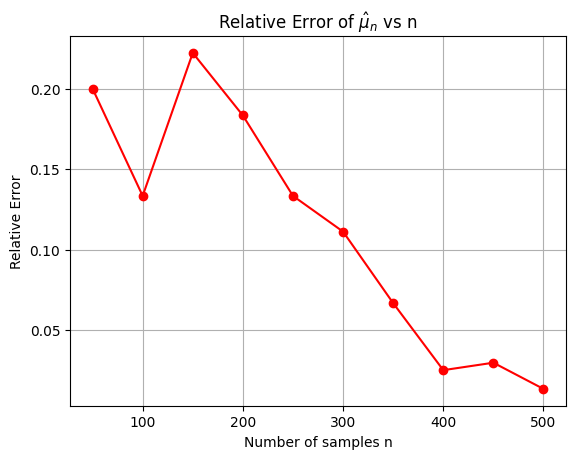

In [ ]:
# REPEAT THE ABOVE EXAMPLE FOR n = [50, 100, 150, ..., 500]
mu = 0.03
n_values = list(range(50, 501, 50))
mean_mus = []
std_mus = []
rel_errors = []

for n in n_values:
    mu_hat_n_reps = np.zeros(k)

    for i in range(k):
        torch.manual_seed(i)
        # generate n perturbations
        deltas = torch.FloatTensor(sigma * torch.randn(n, *img.shape))
        # add them to the base image → shape (n, C, H, W)
        noisy_imgs = img.unsqueeze(0) + deltas

        # batch forward pass
        with torch.no_grad():
            outputs = net(noisy_imgs)
        preds = outputs.argmax(dim=1).cpu().numpy()

        # misclassification rate for this replication
        misclassified_count = np.sum(preds != true_class)
        mu_hat_n_reps[i] = misclassified_count / n

    # mean and std across k replications
    mean_ = np.mean(mu_hat_n_reps)
    std_ = np.std(mu_hat_n_reps)

    mean_mus.append(mean_)
    std_mus.append(std_)
    rel_errors.append(abs(mean_ - mu) / mu)

print(f'List of mean values:{mean_mus}')
print(f'List of std values:{std_mus}')
print(f'List of relative errors values:{rel_errors}')
for n_curr, m, s, r in zip(n_values, mean_mus, std_mus, rel_errors):
    print(f"n={n_curr:3d}  mean_mu_hat={m:.5f}  std={s:.5f}  rel_error={r:.4f}")

# PLOT THE MEAN AND THE CONFIDENCE INTERVAL OF THE k VALUES OF mu_hat_n VS n
plt.plot(n_values, rel_errors, marker='o', color='red')
plt.xlabel("Number of samples n")
plt.ylabel("Relative Error")
plt.title("Relative Error of $\hat{\mu}_n$ vs n")
plt.grid(True)
plt.show()


**3b: MC relative error**

<>:12: SyntaxWarning: invalid escape sequence '\h'
<>:12: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-900462023.py:12: SyntaxWarning: invalid escape sequence '\h'
  plt.title("Relative Error of $\hat{\mu}_n$ vs n")


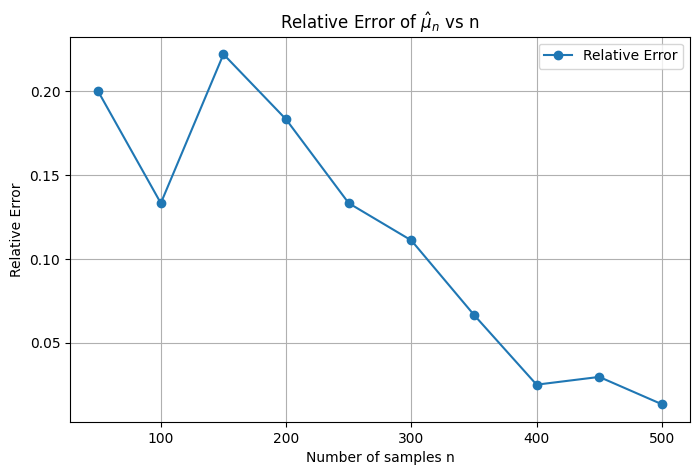

In [ ]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

mu = 0.03 #true mu value

relative_error = np.abs(np.array(mean_mus) - mu) / mu # compute the relative error

# PLOT THE RELATIVE ERROR VS n
plt.figure(figsize=(8,5))
plt.plot(n_values, relative_error, marker='o', label="Relative Error")
plt.xlabel("Number of samples n")
plt.ylabel("Relative Error")
plt.title("Relative Error of $\hat{\mu}_n$ vs n")
plt.grid(True)
plt.legend()
plt.show()

**3c: Misclassification rate w.r.t. samples close to an adversarial example**

In [ ]:
# REPLACE THE THREE DOTS WITH YOUR OWN CODE

# repeat the FGM attack from problem 1c
xtilde = one_call.attack(stop_sign_path, atk=attacks.FGM, nstr='resnet18', ret=True)[0][-1]

# perform mean shift, closer to the adversarial example
scale = 1/3
mean_shift = scale*xtilde

# generate Gaussian samples centered at the mean_shift
torch.manual_seed(0) # set the random seed

deltas = torch.FloatTensor(sigma * torch.randn(n, *img.shape)) + mean_shift

# compute misclassification rate using this new deltas, similar to 3a above
noisy_imgs = img.expand(n, -1, -1, -1) + deltas
preds = []
for noisy_img in noisy_imgs:
  _, _, pred = get_prediction(noisy_img, net)
  preds.append(pred)
preds = np.array(preds)
misclassification_rate = np.mean(preds != true_class)

print(f"Misclassification rate near adversarial example: {misclassification_rate:.4f}")

Misclassification rate near adversarial example: 0.4880
